In [37]:
#Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#Load data
df= pd.read_csv(r"D:\Hackathon\Big mart sales problem - Analytics Vidhya\train_v9rqX0R.csv")

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
data= df[['Item_Weight','Item_MRP']]
data

,Item_Weight,Item_MRP
0,9.300,249.8092
1,5.920,48.2692
2,17.500,141.6180
3,19.200,182.0950
4,8.930,53.8614
...,...,...
8518,6.865,214.5218
8519,8.380,108.1570
8520,10.600,85.1224
8521,7.210,103.1332


<AxesSubplot:ylabel='Density'>

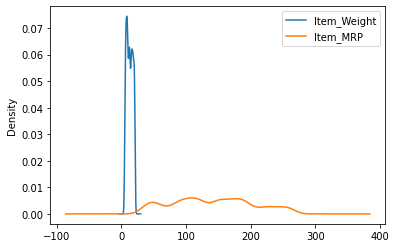

In [40]:
data.plot.kde()

<h2>Normalization using Python </h2>

In [41]:
# copy the data
df_max_scaled = data.copy()

# apply normalization techniques
for column in df_max_scaled.columns:
    
    df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()

# view normalized data
display(df_max_scaled)


,Item_Weight,Item_MRP
0,0.435597,0.936006
1,0.277283,0.180859
2,0.819672,0.530626
3,0.899297,0.682289
4,0.418267,0.201812
...,...,...
8518,0.321546,0.803788
8519,0.392506,0.405252
8520,0.496487,0.318944
8521,0.337705,0.386428


<AxesSubplot:ylabel='Frequency'>

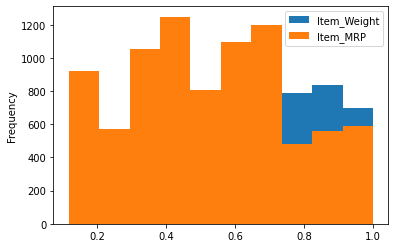

In [42]:
df_max_scaled.plot.hist()

<h3>Normalization The min-max feature scaling</h3>

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

In [43]:
for column in df_max_scaled.columns:
    #print(column)
    df_max_scaled[column] = (df_max_scaled[column]-df_max_scaled[column].min()) / (df_max_scaled[column].abs().max()-df_max_scaled[column].min())

# view normalized data
display(df_max_scaled)

,Item_Weight,Item_MRP
0,0.282525,0.927507
1,0.081274,0.072068
2,0.770765,0.468288
3,0.871986,0.640093
4,0.260494,0.095805
...,...,...
8518,0.137541,0.777729
8519,0.227746,0.326263
8520,0.359929,0.228492
8521,0.158083,0.304939


<AxesSubplot:ylabel='Density'>

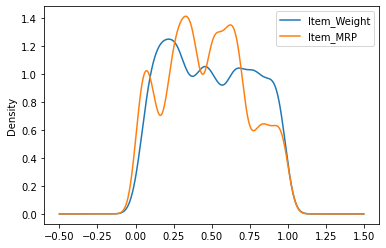

In [44]:
df_max_scaled.plot.kde()

<h2>Normalization using Scikit Learn </h2>

In [45]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit_transform(data)
norm

array([[0.28252456, 0.92750715],
       [0.08127419, 0.0720684 ],
       [0.77076511, 0.46828841],
       ...,
       [0.35992855, 0.22849221],
       [0.15808276, 0.30493925],
       [0.61000298, 0.18750976]])

<AxesSubplot:ylabel='Density'>

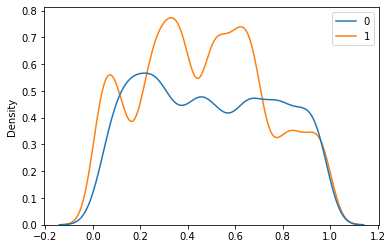

In [46]:
import seaborn as sns
sns.kdeplot(data=norm)

<h3> Standardization Using The z-score method from Python</h3>

The z-score method (often called standardization) transforms the info into distribution with a mean of 0 and a typical deviation of 1. Each standardized value is computed by subtracting the mean of the corresponding feature then dividing by the quality deviation.

In [47]:
for column in df_max_scaled.columns:
    
    df_max_scaled[column] = (df_max_scaled[column]-df_max_scaled[column].mean()) / df_max_scaled[column].std()

# view normalized data
display(df_max_scaled)

,Item_Weight,Item_MRP
0,-0.766163,1.747351
1,-1.494069,-1.488936
2,0.999763,0.010040
3,1.365869,0.660011
4,-0.845845,-1.399138
...,...,...
8518,-1.290557,1.180714
8519,-0.964291,-0.527270
8520,-0.486199,-0.897155
8521,-1.216259,-0.607941


<AxesSubplot:ylabel='Density'>

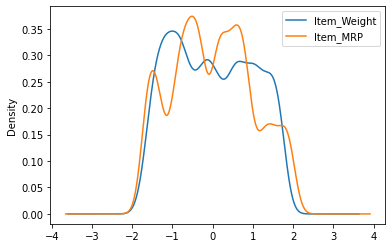

In [48]:
df_max_scaled.plot.kde()

<h3> Standardization using Scikit_learn</h3>

In [50]:
from sklearn.preprocessing import StandardScaler

trans_data= StandardScaler().fit_transform(data)

In [51]:
trans_data

array([[-0.7662174 ,  1.74745381],
       [-1.49417499, -1.48902325],
       [ 0.99983356,  0.01004021],
       ...,
       [-0.48623371, -0.89720755],
       [-1.21634502, -0.60797692],
       [ 0.41832897, -1.05226104]])

<AxesSubplot:ylabel='Density'>

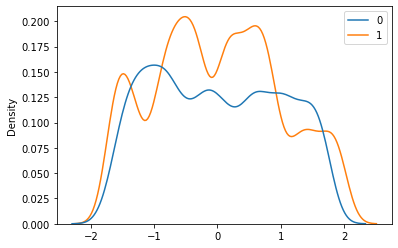

In [53]:
import seaborn as sns
sns.kdeplot(data=trans_data)

<AxesSubplot:>

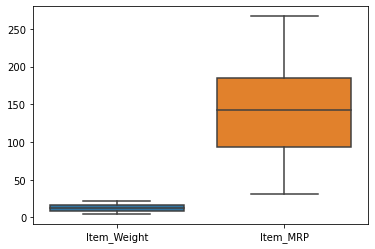

In [56]:
#Boxplot before Standardization
sns.boxplot(data=data )

<AxesSubplot:>

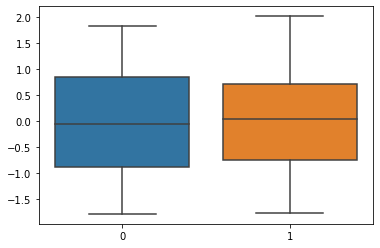

In [57]:
#Boxplot after Standardization

sns.boxplot(data=trans_data )